In [1]:
from Errors import *
import os, glob
import matplotlib.pyplot as plt
import pandas as pd
from pandas import DataFrame

In [2]:
EXPERIMENT = "A"

MULTIPLIERS = {
    "A": 1,
    "B": 10e-3,
    "C": 1,
    "K": 1
}

EVAL_PATH = (
    r"C:\Users\user\Documents\George\CPP_Projects\Procedural_Implicit_Terrain_Raymarching\Images\Eval"
    + f"\\Raymarching-{EXPERIMENT}"
)

plt.style.use("seaborn-v0_8-whitegrid")

plt.rcParams["font.size"] = 16  # Set the global font size
plt.rcParams["font.family"] = "serif"

def get_colors(length):
    return plt.cm.get_cmap("tab20", length)

In [3]:
def plot_error_data(x, data, keys_to_labels, error_name, figsize=(10, 8)):
    real_x = [a * MULTIPLIERS[EXPERIMENT] for a in x]

    fig, axes = plt.subplots(
        figsize=figsize, nrows=len(keys_to_labels), ncols=1, sharex=True
    )

    colors = get_colors(len(keys_to_labels))

    for i, (key, label) in enumerate(keys_to_labels.items()):
        ax = axes[i]
        y = [data[a][key] for a in x]
        ax.plot(real_x, y, marker="o", color=colors(0))
        ax.set_ylabel(label)
        # legend = ax.legend(loc="upper left", frameon=True)
        # legend.get_frame().set_edgecolor("gray")  # Set the border color
        # legend.get_frame().set_facecolor("white")  # Set the background color

    plt.xlabel("a")
    plt.tight_layout()
    plt.show()

    # save the plot
    if not os.path.exists(EXPERIMENT):
        os.makedirs(EXPERIMENT)
    fig.savefig(
        os.path.join(EXPERIMENT, f"{EXPERIMENT}-{error_name}.png"),
        facecolor=fig.get_facecolor(),
        edgecolor=fig.get_edgecolor(),
    )
    fig.savefig(
        os.path.join(EXPERIMENT, f"{EXPERIMENT}-{error_name}.svg"),
        facecolor=fig.get_facecolor(),
        edgecolor=fig.get_edgecolor(),
    )

# IDE

In [4]:
ide_folders = [
    folder
    for folder in os.listdir(EVAL_PATH)
    if folder.startswith(EXPERIMENT) and os.path.isdir(os.path.join(EVAL_PATH, folder))
]

ide_folders.sort( key=lambda x: path_to_value(x) )

print(ide_folders)

['K0-IDE_20240417_172648', 'K1-IDE_20240417_172706', 'K2-IDE_20240417_172723', 'K4-IDE_20240417_172756', 'K6-IDE_20240417_172853', 'K10-IDE_20240417_172911', 'K15-IDE_20240417_172928', 'K20-IDE_20240417_172946']


In [5]:
ide_results = {}
for ide_folder in ide_folders:
    folder_path = os.path.join(EVAL_PATH, ide_folder)
    for file_name in os.listdir(folder_path):
        if file_name.startswith("IDE_1") and file_name.endswith(".png"):
            file_path = os.path.join(folder_path, file_name)
            ide_results[path_to_value(folder_path)] = IDE(file_path, True)
    

For K0-IDE_20240417_172648:
	Among 360000 pixels:
	Number of missed intersections (-1): 385
	Number of no intersections (-100): 28784
	Average IDE value: 51.40678024291992
	Median IDE value: 0.345947265625
	Lowest IDE value: 6.103515625e-05
	Highest IDE value: 60500.671875
For K1-IDE_20240417_172706:
	Among 360000 pixels:
	Number of missed intersections (-1): 385
	Number of no intersections (-100): 28784
	Average IDE value: 48.8992919921875
	Median IDE value: 0.1280517578125
	Lowest IDE value: 6.103515625e-05
	Highest IDE value: 60491.1875
For K2-IDE_20240417_172723:
	Among 360000 pixels:
	Number of missed intersections (-1): 385
	Number of no intersections (-100): 28784
	Average IDE value: 47.889583587646484
	Median IDE value: 0.0450439453125
	Lowest IDE value: 6.103515625e-05
	Highest IDE value: 60448.17578125
For K4-IDE_20240417_172756:
	Among 360000 pixels:
	Number of missed intersections (-1): 385
	Number of no intersections (-100): 28784
	Average IDE value: 47.42179870605469
	Med

In [6]:
print(ide_results)

{0.0: {'num_missed_intersection': 385, 'num_no_intersection': 28784, 'average_IDE': 51.40678, 'highest_value': 60500.67, 'lowest_value': 6.1035156e-05, 'median_value': 0.34594727}, 1.0: {'num_missed_intersection': 385, 'num_no_intersection': 28784, 'average_IDE': 48.899292, 'highest_value': 60491.188, 'lowest_value': 6.1035156e-05, 'median_value': 0.12805176}, 2.0: {'num_missed_intersection': 385, 'num_no_intersection': 28784, 'average_IDE': 47.889584, 'highest_value': 60448.176, 'lowest_value': 6.1035156e-05, 'median_value': 0.045043945}, 4.0: {'num_missed_intersection': 385, 'num_no_intersection': 28784, 'average_IDE': 47.4218, 'highest_value': 60444.082, 'lowest_value': 6.1035156e-05, 'median_value': 0.012268066}, 6.0: {'num_missed_intersection': 385, 'num_no_intersection': 28784, 'average_IDE': 47.560802, 'highest_value': 60448.6, 'lowest_value': 6.1035156e-05, 'median_value': 0.0068359375}, 10.0: {'num_missed_intersection': 385, 'num_no_intersection': 28784, 'average_IDE': 48.4563

[0.0, 1.0, 2.0, 4.0, 6.0, 10.0, 15.0, 20.0]


C:\Users\user\AppData\Local\Temp\ipykernel_14748\4193512877.py:21: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  return plt.cm.get_cmap("tab20", length)


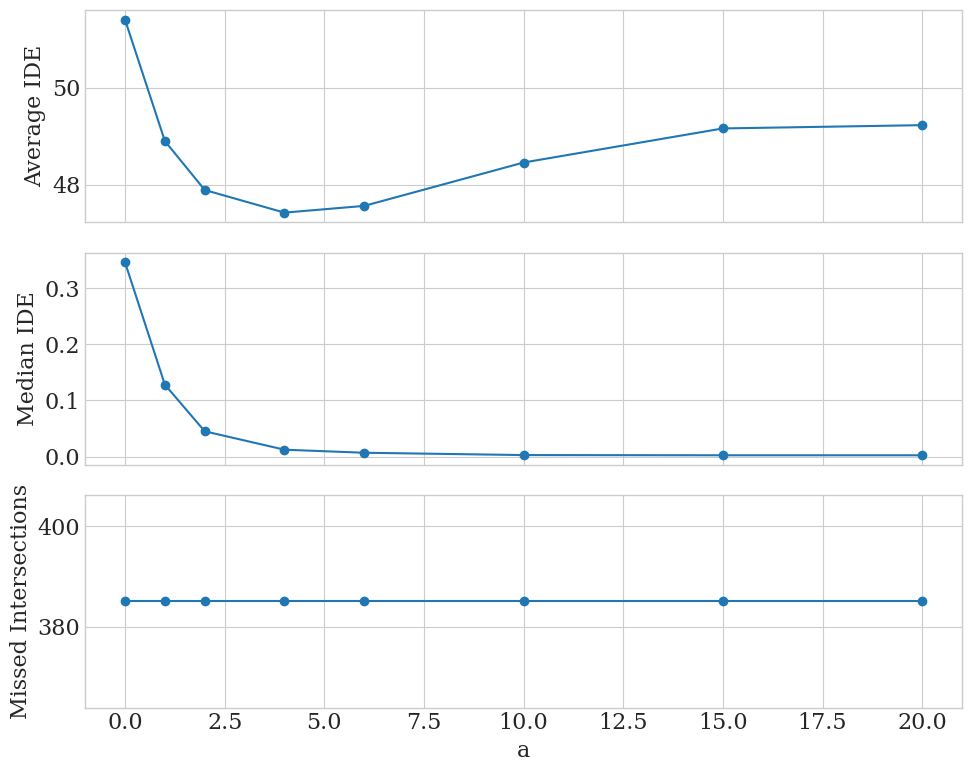

In [7]:
# Extract the keys and values from ide_results dictionary
x = list(ide_results.keys())
x = [float(a) for a in x]
x.sort()
print(x)


keys_to_labels = {
    "average_IDE": "Average IDE",
    "median_value": "Median IDE",
    "num_missed_intersection": "Missed Intersections",
}


plot_error_data(x, ide_results, keys_to_labels, "IDE")

# HDE

In [8]:
hde_paths = glob.glob(os.path.join(EVAL_PATH, f'{EXPERIMENT}*.png'))

hde_paths.sort( key=lambda x: path_to_value(x) )
print(hde_paths)

['C:\\Users\\user\\Documents\\George\\CPP_Projects\\Procedural_Implicit_Terrain_Raymarching\\Images\\Eval\\Raymarching-K\\K0-HDE_20240417_172658.png', 'C:\\Users\\user\\Documents\\George\\CPP_Projects\\Procedural_Implicit_Terrain_Raymarching\\Images\\Eval\\Raymarching-K\\K1-HDE_20240417_172715.png', 'C:\\Users\\user\\Documents\\George\\CPP_Projects\\Procedural_Implicit_Terrain_Raymarching\\Images\\Eval\\Raymarching-K\\K2-HDE_20240417_172742.png', 'C:\\Users\\user\\Documents\\George\\CPP_Projects\\Procedural_Implicit_Terrain_Raymarching\\Images\\Eval\\Raymarching-K\\K4-HDE_20240417_172805.png', 'C:\\Users\\user\\Documents\\George\\CPP_Projects\\Procedural_Implicit_Terrain_Raymarching\\Images\\Eval\\Raymarching-K\\K6-HDE_20240417_172900.png', 'C:\\Users\\user\\Documents\\George\\CPP_Projects\\Procedural_Implicit_Terrain_Raymarching\\Images\\Eval\\Raymarching-K\\K10-HDE_20240417_172918.png', 'C:\\Users\\user\\Documents\\George\\CPP_Projects\\Procedural_Implicit_Terrain_Raymarching\\Images

In [9]:
hde_results = {}
for hde_path in hde_paths:
    hde_results[path_to_value(hde_path)] = HDE(hde_path, True)

For K0-HDE_20240417_172658.png:
	Among 360000 pixels:
	Number of no intersections: 29169
	Average HDE value: 2.5597658157348633
	Lowest HDE value: 3.9546284824609756e-07
	Highest HDE value: 490.706298828125
For K1-HDE_20240417_172715.png:
	Among 360000 pixels:
	Number of no intersections: 29169
	Average HDE value: 1.1458911895751953
	Lowest HDE value: 4.413595888763666e-08
	Highest HDE value: 303.39166259765625
For K2-HDE_20240417_172742.png:
	Among 360000 pixels:
	Number of no intersections: 29169
	Average HDE value: 0.4831453859806061
	Lowest HDE value: 6.024492904543877e-09
	Highest HDE value: 127.52555847167969
For K4-HDE_20240417_172805.png:
	Among 360000 pixels:
	Number of no intersections: 29169
	Average HDE value: 0.08493857830762863
	Lowest HDE value: 1.7957063391804695e-08
	Highest HDE value: 24.312246322631836
For K6-HDE_20240417_172900.png:
	Among 360000 pixels:
	Number of no intersections: 29169
	Average HDE value: 0.01795295625925064
	Lowest HDE value: 8.119968697428703e-

C:\Users\user\AppData\Local\Temp\ipykernel_14748\4193512877.py:21: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  return plt.cm.get_cmap("tab20", length)


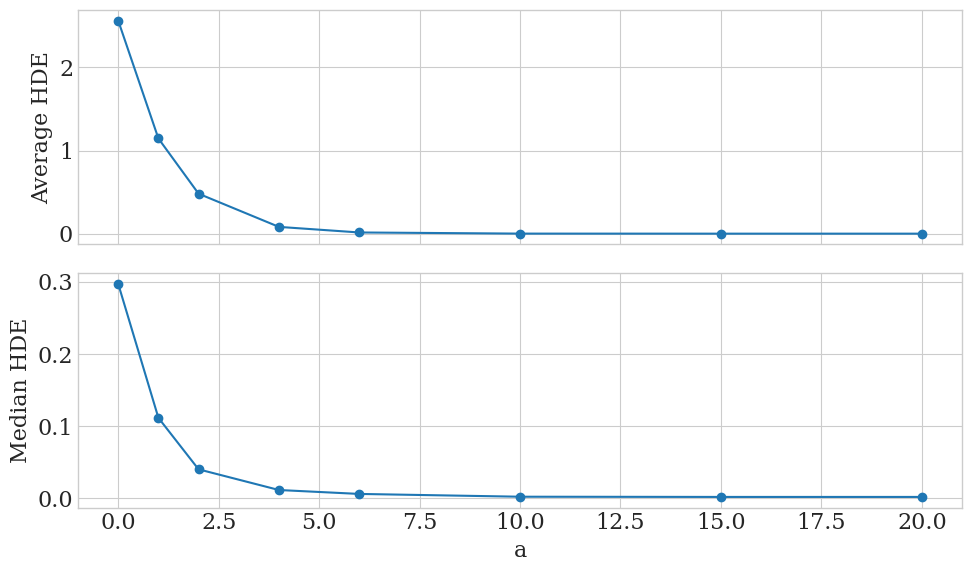

In [10]:
x = [float(a) for a in hde_results.keys()]

keys_to_labels = {
    "average_HDE": "Average HDE",
    "median_value": "Median HDE",
}

plot_error_data(x, hde_results, keys_to_labels, "HDE", figsize=(10, 6))

# Performance

In [11]:
csv_path = EVAL_PATH + f"\\{EXPERIMENT}-perf.csv"
csv_path

'C:\\Users\\user\\Documents\\George\\CPP_Projects\\Procedural_Implicit_Terrain_Raymarching\\Images\\Eval\\Raymarching-K\\K-perf.csv'

In [12]:
df: DataFrame = pd.read_csv(csv_path)

print(df)

    K  Frame Time
0   0   10.556905
1   1   11.531573
2   2   12.356441
3   4   14.111975
4   6   16.177557
5  10   18.818190
6  15   20.821569
7  20   21.721004


C:\Users\user\AppData\Local\Temp\ipykernel_14748\4193512877.py:21: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  return plt.cm.get_cmap("tab20", length)


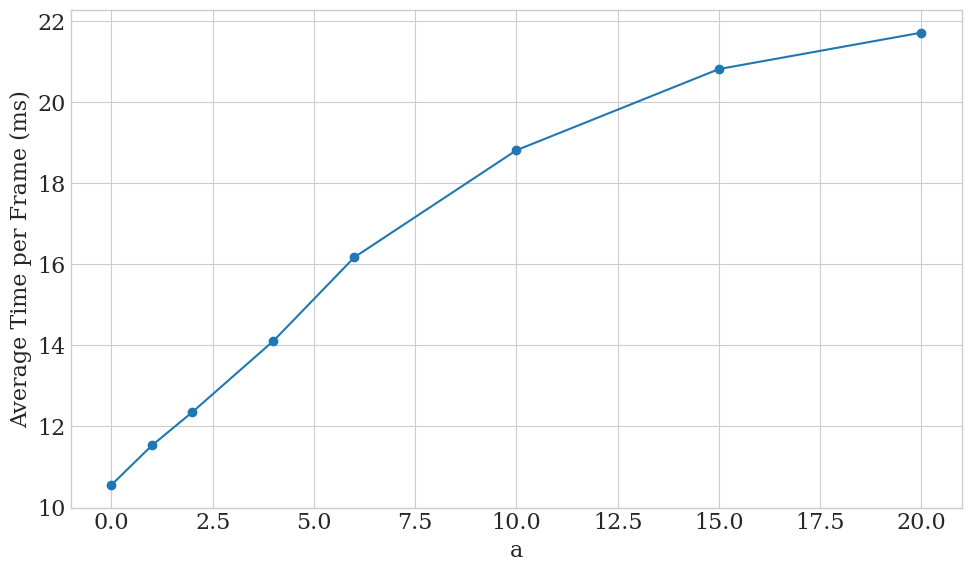

In [13]:
fig, ax = plt.subplots(figsize=(10, 6))

colors = get_colors(1)
ax.plot(df.iloc[:, 0], df.iloc[:, 1], label="FPS", marker="o", color=colors(0))
plt.xlabel("a")
plt.ylabel("Average Time per Frame (ms)")
plt.tight_layout()

fig.savefig(
    os.path.join(EXPERIMENT, f"{EXPERIMENT}-Performance.png"),
    facecolor=fig.get_facecolor(),
    edgecolor=fig.get_edgecolor(),
)
fig.savefig(
    os.path.join(EXPERIMENT, f"{EXPERIMENT}-Performance.svg"),
    facecolor=fig.get_facecolor(),
    edgecolor=fig.get_edgecolor(),
)